#### importing pandas, numpy, matplotlib,seaborn warning lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### importing the csv dataset as pandas dataframe

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isna().sum()
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### statistics of the data

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.duplicated().sum()
# df.drop_duplicates(inplace=True)


0

#### checking the unique of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
print(df["gender"].unique())
print(df["gender"].nunique())

['female' 'male']
2


In [11]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

#### plotting the graphs of all 

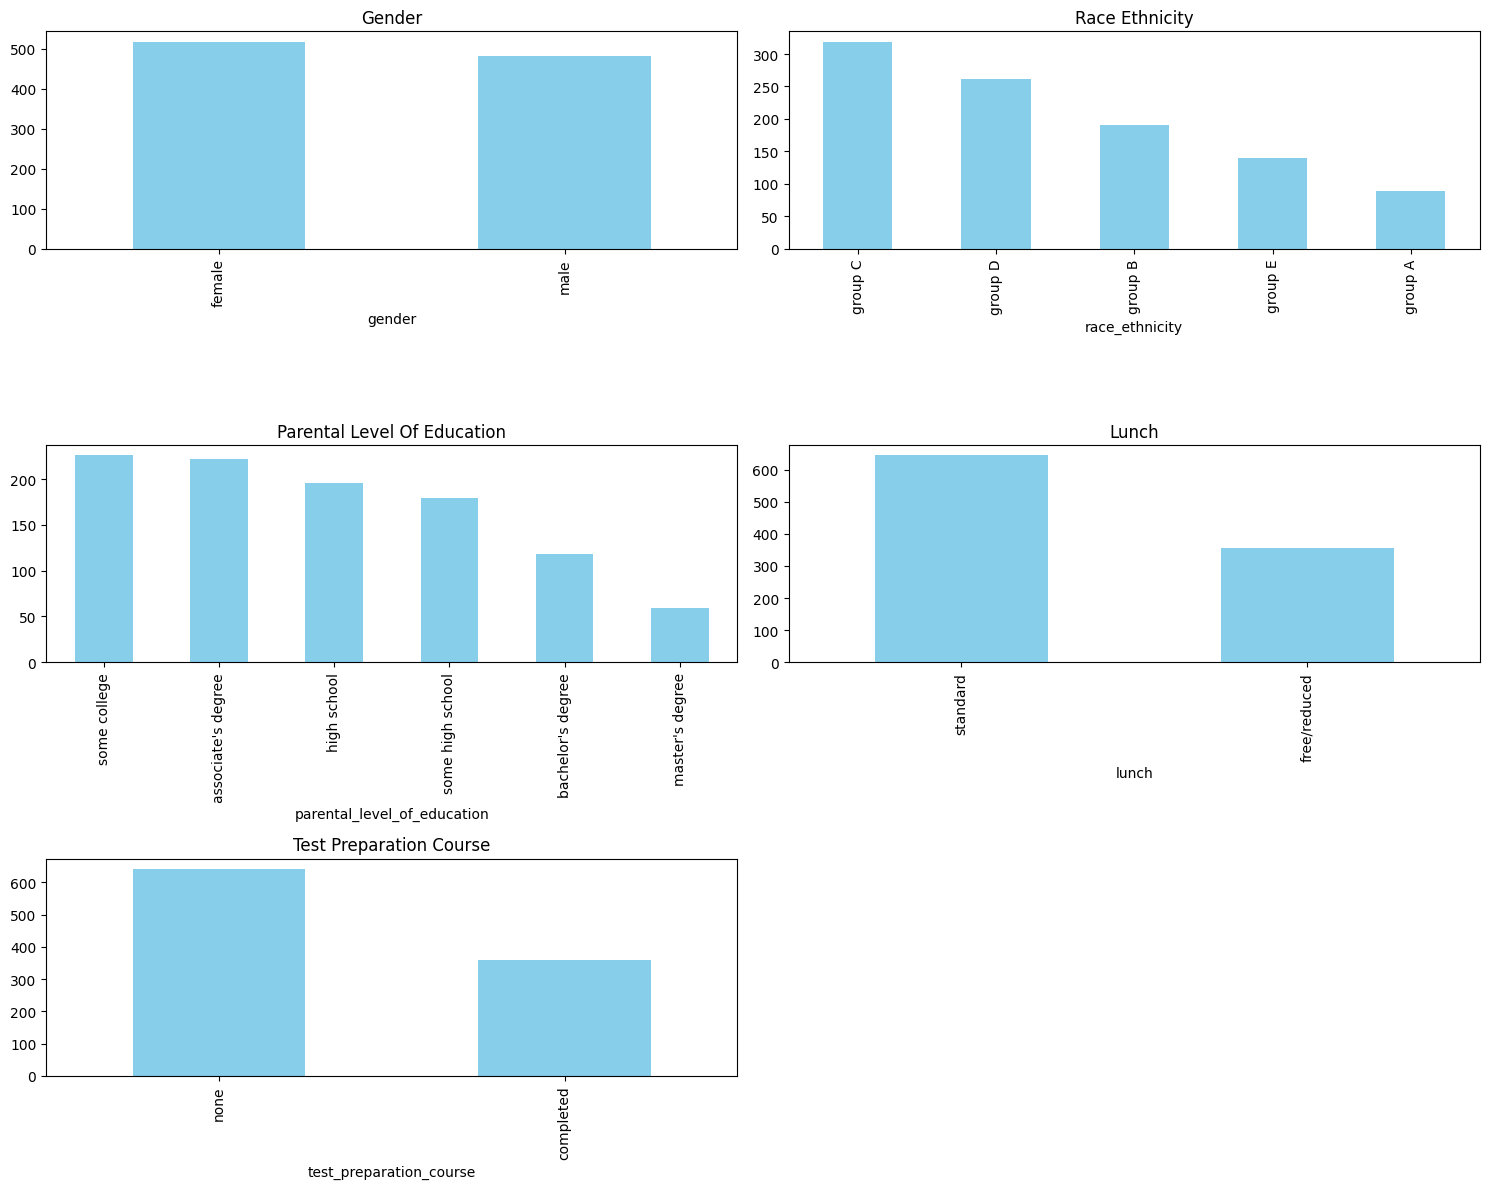

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axs = axs.flatten()  # Flatten to easily index

# Column names to plot
columns = [
    "gender",
    "race_ethnicity",
    "parental_level_of_education",
    "lunch",
    "test_preparation_course"
]

# Plot each bar chart
for i, col in enumerate(columns):
    df[col].value_counts().plot(kind="bar", color="skyblue", ax=axs[i])
    axs[i].set_title(col.replace("_", " ").title())

# Hide the empty subplot if any
for j in range(len(columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

#### splitting the dataset into numeric feature n categorical_features


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['math_score', 'reading_score', 'writing_score']
Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding columns for "Total score" and "Average"

In [14]:
df["total_score"] = df[numeric_features].sum(axis=1)
df['average_score'] = df[numeric_features].mean(axis=1)

In [15]:
df.describe()

,math_score,reading_score,writing_score,total_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [16]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333


#### student marks = 100

In [27]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f"Number of students with full reading score: {reading_full}")
print(f"Number of students with full writing score: {writing_full}")
print(f"Number of students with full math score: {math_full}")


Number of students with full reading score: 17
Number of students with full writing score: 14
Number of students with full math score: 7


#### student marks less than 20

In [28]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f"Number of students with full reading score: {reading_less_20}")
print(f"Number of students with full writing score: {writing_less_20}")
print(f"Number of students with full math score: {math_less_20}")


Number of students with full reading score: 1
Number of students with full writing score: 3
Number of students with full math score: 4


#### histogram #kde


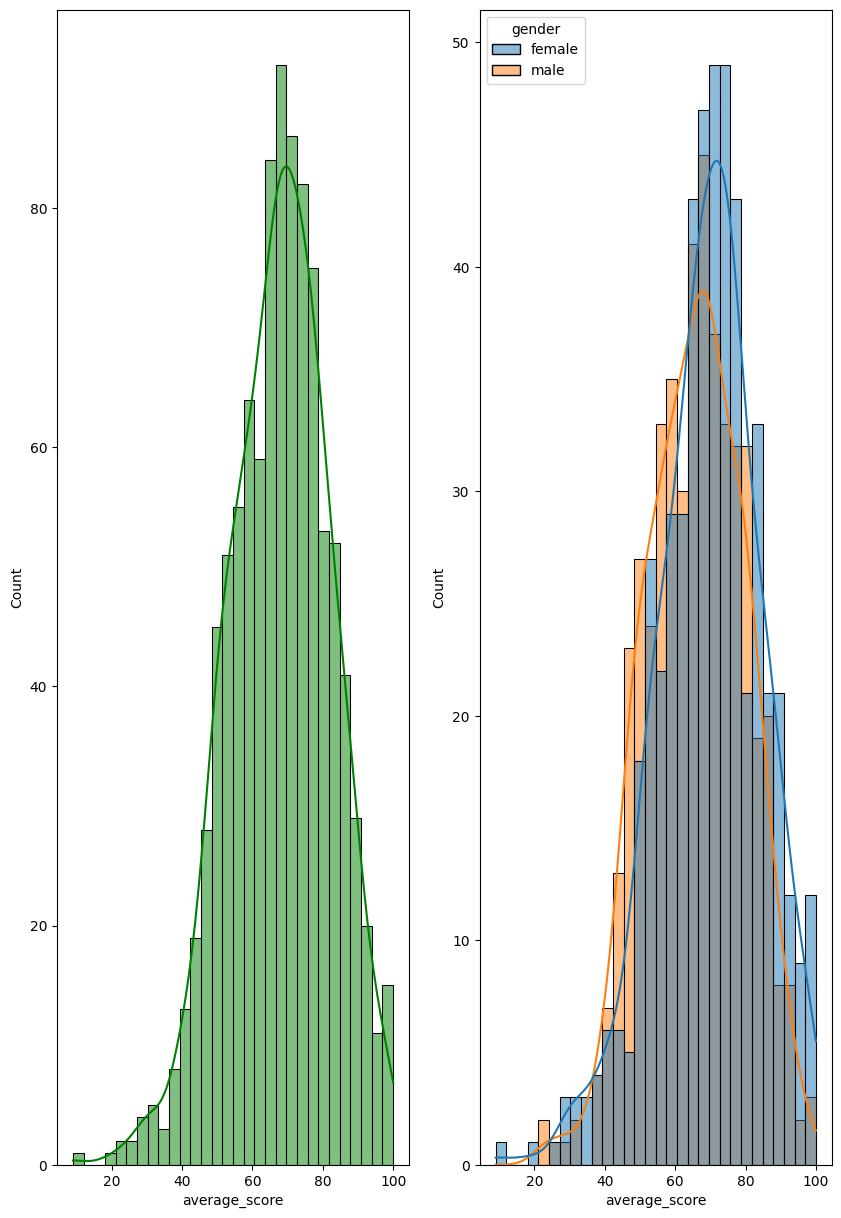

In [37]:
fig, axs = plt.subplots(1,2, figsize=(10, 15))
plt.subplot(121)
sns.histplot(df,x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data = df,x='average_score', bins=30, kde=True, hue='gender')
plt.show()